In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [54]:
df1= pd.read_csv('freq-kebakaran-banyaknya-terbakar-penghuni-korban-dan-taksiran-kerugian(2015-2023).csv')
df2= pd.read_csv('jumlah-peristiwa-kebakaran-menurut-kelurahan(2015-2023).csv')
df3= pd.read_csv('jumlah-objek-bencana-kebakaran-menurut-benda-yang-terbakar-jakarta-new.csv')


In [28]:
df1

,periode_data,frekuensi,jumlah_obyek,jumlah_korban_petugas,jumlah_korban_warga,taksiran_kerugian,total_korban
0,2023,2286,4673,0,46,280507180500,46
1,2022,1691,4017,0,26,245113580000,26
2,2021,1535,4093,0,25,209490000000,25
3,2020,1505,3156,0,18,252057901000,18
4,2019,2183,5144,0,27,322051939000,27
5,2018,1751,3147,1,23,238936725000,24
6,2017,1471,5514,0,46,475218955000,46
7,2016,1171,3549,0,21,213482400000,21
8,2015,1569,4700,0,22,377812400000,22


In [4]:
df1.columns

Index(['periode_data', 'frekuensi', 'jumlah_obyek', 'jumlah_korban_petugas',
       'jumlah_korban_warga', 'taksiran_kerugian'],
      dtype='object')

In [46]:
df2.head()

,periode_data,wilayah,kecamatan,kelurahan,penyebab_kebakaran,jumlah
0,2023,Jakarta Pusat,Gambir,Petojo Selatan,Listrik,6
1,2023,Jakarta Pusat,Gambir,Petojo Selatan,Lainnya,1
2,2023,Jakarta Pusat,Gambir,Petojo Selatan,Gas,3
3,2023,Jakarta Pusat,Gambir,Kebon Kelapa,Listrik,1
4,2023,Jakarta Pusat,Gambir,Kebon Kelapa,Lainnya,1


In [6]:
df2['penyebab_kebakaran'].value_counts()

Listrik            2225
Lainnya             947
Gas                 875
Membakar Sampah     730
Rokok               461
Lain                311
Kompor              152
Lilin                52
Lampu                 4
Name: penyebab_kebakaran, dtype: int64

In [47]:
df3.head()

,tahun,objek,jumlah
0,2023,perumahan,637
1,2023,bangunan,373
2,2023,kendaraan bermotor,118
3,2023,instalasi luar gedung,480
4,2023,tumbuhan,215


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   periode_data           9 non-null      int64
 1   frekuensi              9 non-null      int64
 2   jumlah_obyek           9 non-null      int64
 3   jumlah_korban_petugas  9 non-null      int64
 4   jumlah_korban_warga    9 non-null      int64
 5   taksiran_kerugian      9 non-null      int64
dtypes: int64(6)
memory usage: 560.0 bytes


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5758 entries, 0 to 5757
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   periode_data        5758 non-null   int64 
 1   wilayah             5758 non-null   object
 2   kecamatan           5758 non-null   object
 3   kelurahan           5758 non-null   object
 4   penyebab_kebakaran  5757 non-null   object
 5   jumlah              5758 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 270.0+ KB


In [41]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tahun   60 non-null     int64 
 1   objek   60 non-null     object
 2   jumlah  60 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.5+ KB


Handling missing value dan membersihkan data

In [55]:
# handling missing value
df2['penyebab_kebakaran'].fillna('Lainnya', inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5758 entries, 0 to 5757
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   periode_data        5758 non-null   int64 
 1   wilayah             5758 non-null   object
 2   kecamatan           5758 non-null   object
 3   kelurahan           5758 non-null   object
 4   penyebab_kebakaran  5758 non-null   object
 5   jumlah              5758 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 270.0+ KB


In [56]:
df1['total_korban']= df1['jumlah_korban_petugas'] + df1['jumlah_korban_warga']
df1.head(6)

,periode_data,frekuensi,jumlah_obyek,jumlah_korban_petugas,jumlah_korban_warga,taksiran_kerugian,total_korban
0,2023,2286,4673,0,46,280507180500,46
1,2022,1691,4017,0,26,245113580000,26
2,2021,1535,4093,0,25,209490000000,25
3,2020,1505,3156,0,18,252057901000,18
4,2019,2183,5144,0,27,322051939000,27
5,2018,1751,3147,1,23,238936725000,24


In [50]:
df2['penyebab_kebakaran'].replace('Lain', 'Lainnya', inplace=True)
df2['penyebab_kebakaran'].value_counts()

Listrik            2225
Lainnya            1259
Gas                 875
Membakar Sampah     730
Rokok               461
Kompor              152
Lilin                52
Lampu                 4
Name: penyebab_kebakaran, dtype: int64

In [16]:
# df1['periode_data'] = pd.to_datetime(df1['periode_data'], format='%Y')
# df1['tahun'] = df1['periode_data'].dt.year
# df1['periode_data'] = pd.to_datetime(df1['periode_data'], format='%Y')

In [24]:
# Buat DataFrame dengan kolom tahun
# data = {'tahun': [2015, 2016, 2017, 2023]}
# df = pd.DataFrame(data)

# Konversi kolom 'tahun' menjadi tipe data datetime dengan tanggal 31 Desember
# df1['tahun'] = pd.to_datetime(df1['periode_data'], format='%Y').dt.strftime('%Y-%m-%d')
# df1['tahun'] = pd.to_datetime(df1['periode_data'].astype(str) + '-12-31')
# df1

,periode_data,frekuensi,jumlah_obyek,jumlah_korban_petugas,jumlah_korban_warga,taksiran_kerugian,tahun
0,2023,2286,4673,0,46,280507180500,2023-12-31
1,2022,1691,4017,0,26,245113580000,2022-12-31
2,2021,1535,4093,0,25,209490000000,2021-12-31
3,2020,1505,3156,0,18,252057901000,2020-12-31
4,2019,2183,5144,0,27,322051939000,2019-12-31
5,2018,1751,3147,1,23,238936725000,2018-12-31
6,2017,1471,5514,0,46,475218955000,2017-12-31
7,2016,1171,3549,0,21,213482400000,2016-12-31
8,2015,1569,4700,0,22,377812400000,2015-12-31


1. jumlah kejadian kebakaran tiap tahun

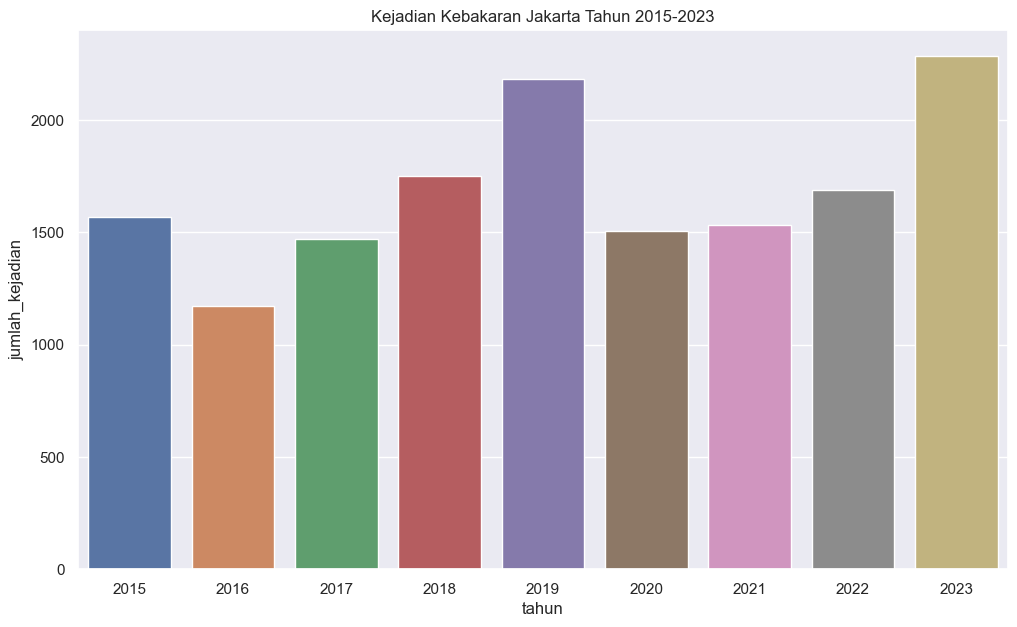

In [27]:
sns.barplot(x=df1['periode_data'], y=df1['frekuensi'])
sns.set(rc={'figure.figsize':(12,6)})
plt.title('Kejadian Kebakaran Jakarta Tahun 2015-2023')
plt.xlabel('tahun')
plt.ylabel('jumlah_kejadian')
plt.show()

2. jumlah kebakaran per wilayah

In [16]:
# df2.head()
kebakaran_per_wilayah= pd.DataFrame(df2.groupby(['periode_data','wilayah'])['jumlah'].sum().reset_index(name='jumlah'))
kebakaran_per_wilayah

,periode_data,wilayah,jumlah
0,2015,Jakarta Barat,370
1,2015,Jakarta Pusat,181
2,2015,Jakarta Selatan,374
3,2015,Jakarta Timur,388
4,2015,Jakarta Utara,248
5,2015,Kepulauan Seribu,8
6,2016,Jakarta Barat,283
7,2016,Jakarta Pusat,141
8,2016,Jakarta Selatan,241
9,2016,Jakarta Timur,246


In [63]:
x= kebakaran_per_wilayah.groupby(['wilayah'])['jumlah'].sum().reset_index()

In [64]:
pd.DataFrame(x)

,wilayah,jumlah
0,Jakarta Barat,3176
1,Jakarta Pusat,1873
2,Jakarta Selatan,3994
3,Jakarta Timur,3647
4,Jakarta Utara,2421
5,Kepulauan Seribu,27


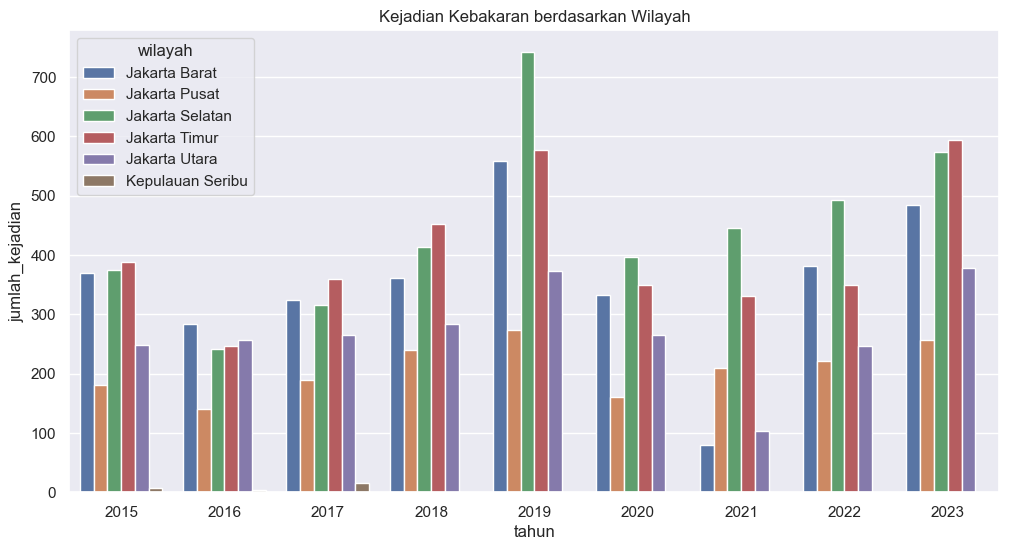

In [17]:
sns.barplot(x='periode_data', y='jumlah' ,hue='wilayah', data=kebakaran_per_wilayah)
sns.set(rc={'figure.figsize':(12,7)})
plt.title('Kejadian Kebakaran berdasarkan Wilayah')
plt.xlabel('tahun')
plt.ylabel('jumlah_kejadian')
plt.show()

3. jumlah objek terdampak tiap tahun

In [76]:
pd.DataFrame(df3.groupby(['objek'])['jumlah'].sum().sort_values(ascending=False).reset_index()) #13.903


,objek,jumlah
0,perumahan,4219
1,instalasi luar gedung,2841
2,bangunan,2351
3,lainnya,1904
4,sampah,927
5,kendaraan bermotor,848
6,tumbuhan,654
7,lapak,159


In [70]:
kebakaran_per_objek= pd.DataFrame(df3.groupby(['tahun','objek'])['jumlah'].sum().reset_index())
kebakaran_per_objek

,tahun,objek,jumlah
0,2015,bangunan,281
1,2015,kendaraan bermotor,104
2,2015,lainnya,628
3,2015,perumahan,468
4,2017,bangunan,232
5,2017,instalasi luar gedung,0
6,2017,kendaraan bermotor,109
7,2017,lainnya,625
8,2017,lapak,0
9,2017,perumahan,505


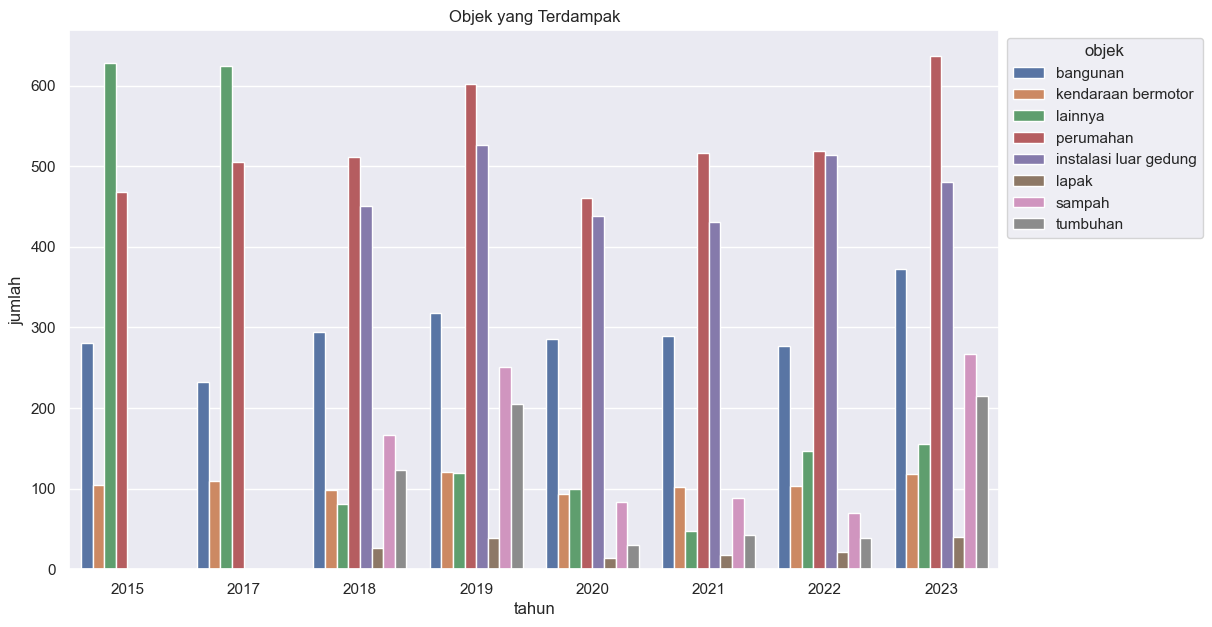

In [72]:
ax= sns.barplot(x='tahun', y='jumlah' ,hue='objek', data=kebakaran_per_objek)
sns.set(rc={'figure.figsize':(13,7)})
plt.title('Objek yang Terdampak')
sns.move_legend(ax,"upper left", bbox_to_anchor=(1, 1))
# plt.xlabel('tahun')
# plt.ylabel('jumlah_objek')
plt.show()

4. jumlah kebakaran berdasarkan penyebab

In [38]:
kebakaran_per_penyebab= pd.DataFrame(df2.groupby(['periode_data','penyebab_kebakaran'])['jumlah'].sum().reset_index(name='jumlah'))
kebakaran_per_penyebab


,periode_data,penyebab_kebakaran,jumlah
0,2015,Kompor,104
1,2015,Lainnya,496
2,2015,Listrik,873
3,2015,Rokok,96
4,2016,Kompor,86
5,2016,Lainnya,202
6,2016,Lampu,4
7,2016,Listrik,851
8,2016,Rokok,28
9,2017,Gas,185


In [65]:
z= kebakaran_per_penyebab.groupby('penyebab_kebakaran')['jumlah'].sum().reset_index() #15.138
pd.DataFrame(z)

,penyebab_kebakaran,jumlah
0,Gas,1305
1,Kompor,190
2,Lainnya,2356
3,Lampu,4
4,Lilin,58
5,Listrik,9173
6,Membakar Sampah,1437
7,Rokok,615


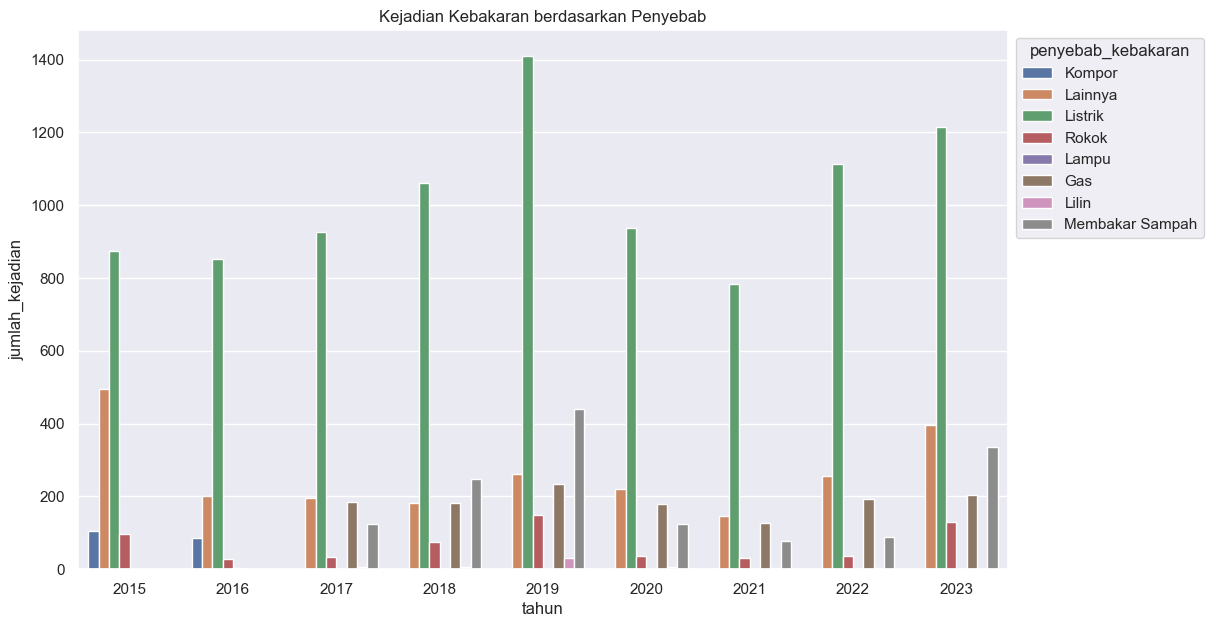

In [31]:
ax= sns.barplot(x='periode_data', y='jumlah' ,hue='penyebab_kebakaran', data=kebakaran_per_penyebab)
sns.set(rc={'figure.figsize':(12,7)})
plt.title('Kejadian Kebakaran berdasarkan Penyebab')
sns.move_legend(ax,"upper left", bbox_to_anchor=(1, 1))
# plt.xlabel('tahun')
# plt.ylabel('jumlah_kejadian')
plt.show()

5. jumlah kerugian kebakaran tiap tahun

In [50]:
df1[['periode_data', 'taksiran_kerugian']]

,periode_data,taksiran_kerugian
0,2023,280507180500
1,2022,245113580000
2,2021,209490000000
3,2020,252057901000
4,2019,322051939000
5,2018,238936725000
6,2017,475218955000
7,2016,213482400000
8,2015,377812400000


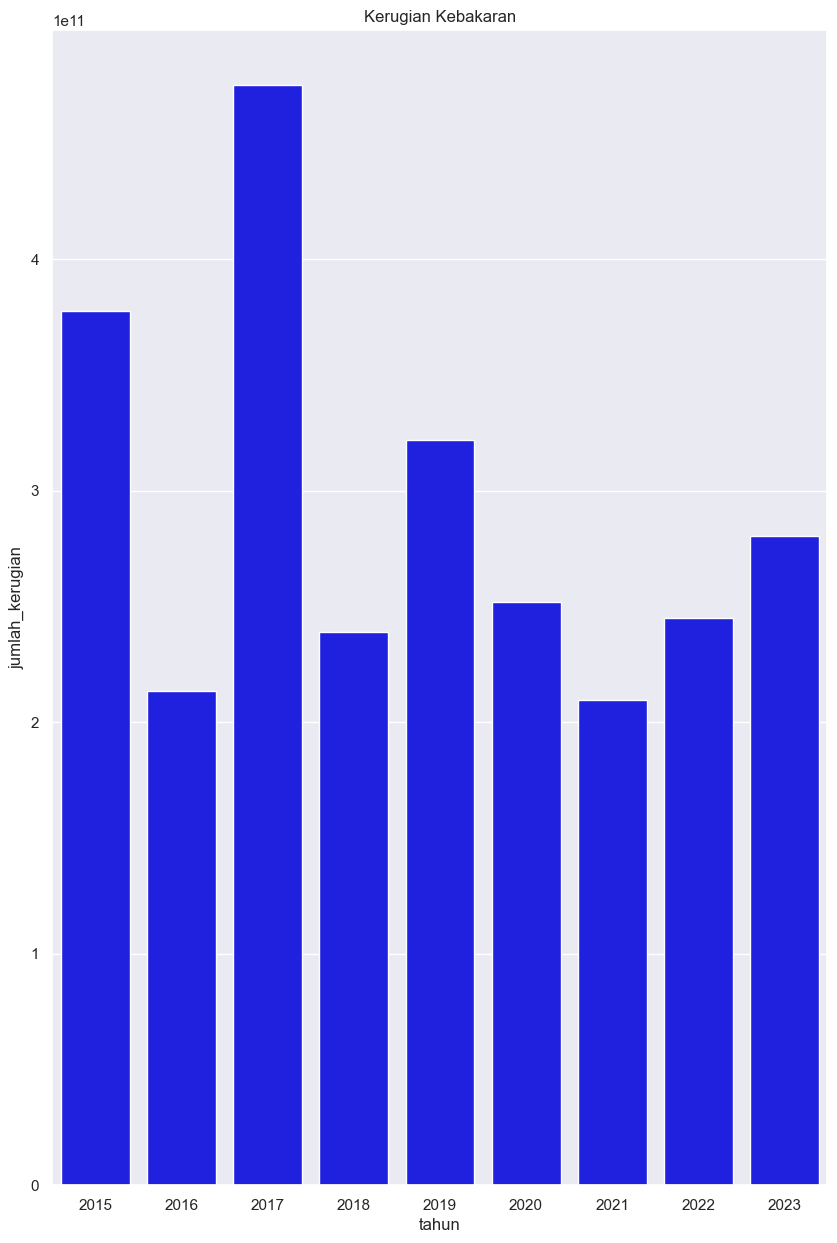

In [33]:
sns.barplot(data=df1, x='periode_data', y='taksiran_kerugian', palette=None, color='blue')
sns.set(rc={'figure.figsize':(10,15)})
plt.title('Kerugian Kebakaran')
plt.xlabel('tahun')
plt.ylabel('jumlah_kerugian')
plt.show()

6. jumlah korban kebakaran

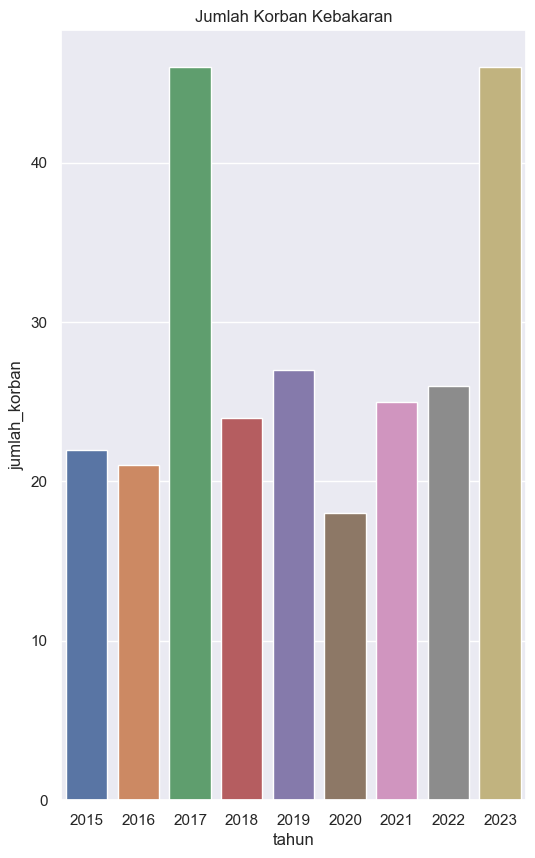

In [37]:
sns.barplot(data=df1, x='periode_data', y='total_korban')
sns.set(rc={'figure.figsize':(7,10)})
plt.title('Jumlah Korban Kebakaran')
plt.xlabel('tahun')
plt.ylabel('jumlah_korban')
plt.show()

In [56]:
df1[['periode_data','total_korban']]

,periode_data,total_korban
0,2023,46
1,2022,26
2,2021,25
3,2020,18
4,2019,27
5,2018,24
6,2017,46
7,2016,21
8,2015,22


menyimpan data yang telah dibersihkan

In [66]:
df1.to_csv('freq_kebakaran_cleaned.csv', encoding='utf-8', index=False)

In [67]:
df2.to_csv('jumlah_peristiwa_kebakaran_cleaned.csv', encoding='utf-8', index=False)